# PRPA Results

In [4]:
import numpy as np
import matplotlib.pyplot as plt

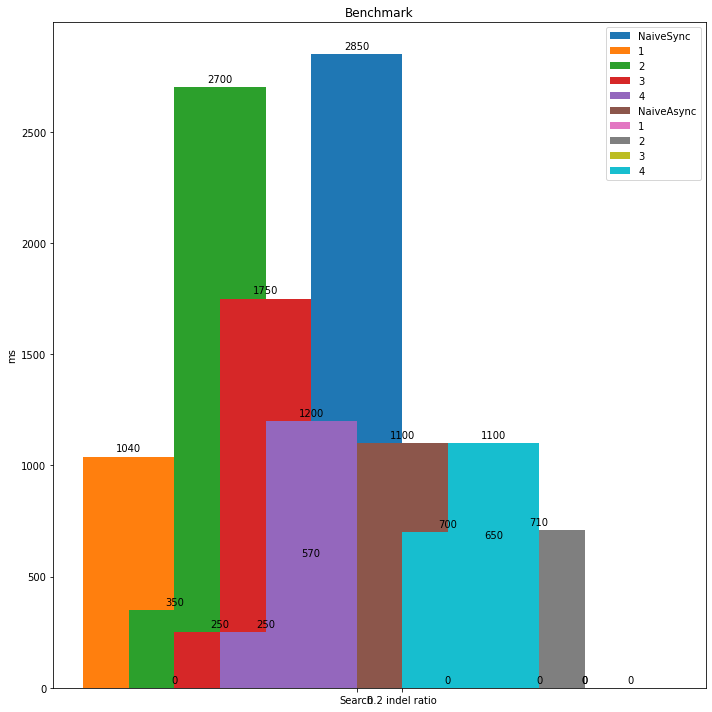

In [18]:
labels = ['Search', '0.2 indel ratio']
NaiveSync = [570, 2850]
TrieSync1 = [1040, 0]
TrieSync2 = [350, 2700]
TrieSync3 = [250, 1750]
TrieSync4 = [250, 1200]
NaiveAsync = [1100, 0]
TrieAsync1 = [0, 0]
TrieAsync2 = [710, 0]
TrieAsync3 = [650, 0]
TrieAsync4 = [700, 1100]

x = np.arange(len(labels))
width = 2.0

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, NaiveSync, width, label='NaiveSync')
rects2 = ax.bar(x - 5*width/2, TrieSync1, width, label='1')
rects3 = ax.bar(x - 2*width, TrieSync2, width, label='2')
rects4 = ax.bar(x - 3*width/2, TrieSync3, width, label='3')
rects5 = ax.bar(x - width, TrieSync4, width, label='4')
rects6 = ax.bar(x + width/2, NaiveAsync, width, label='NaiveAsync')
rects7 = ax.bar(x + 5*width/2, TrieAsync1, width, label='1')
rects8 = ax.bar(x + 2*width, TrieAsync2, width, label='2')
rects9 = ax.bar(x + 3*width/2, TrieAsync3, width, label='3')
rects10 = ax.bar(x + width, TrieAsync4, width, label='4')

ax.set_ylabel('ms')
ax.set_title('Benchmark')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bench):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in bench:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects100)

,
    'TrieAsync1' : [0, 0],
    'TrieAsync2' : [710, 0],
    'TrieAsync3' : [700, 1100]
        
        
    'TrieSync2' : [350, 2700],
    'TrieSync3' : [250, 1200],
    'TrieAsync1' : [0, 8722],
    'TrieAsync2' : [710, 0],
    'TrieAsync3' : [700, 1100]

fig.tight_layout()
plt.show()

          Versions  Trie  TrieAsync  Hashmap  HashmapAsync  Fusion  \
0           Search   300        750      240           790     340   
1  0.2 indel ratio   900        975     1450          1200    2200   

   FusionAsync  
0         1000  
1         1200  
           Versions                Speed
0            Search          Trie    300
1   0.2 indel ratio          Trie    900
2            Search     TrieAsync    750
3   0.2 indel ratio     TrieAsync    975
4            Search       Hashmap    240
5   0.2 indel ratio       Hashmap   1450
6            Search  HashmapAsync    790
7   0.2 indel ratio  HashmapAsync   1200
8            Search        Fusion    340
9   0.2 indel ratio        Fusion   2200
10           Search   FusionAsync   1000
11  0.2 indel ratio   FusionAsync   1200


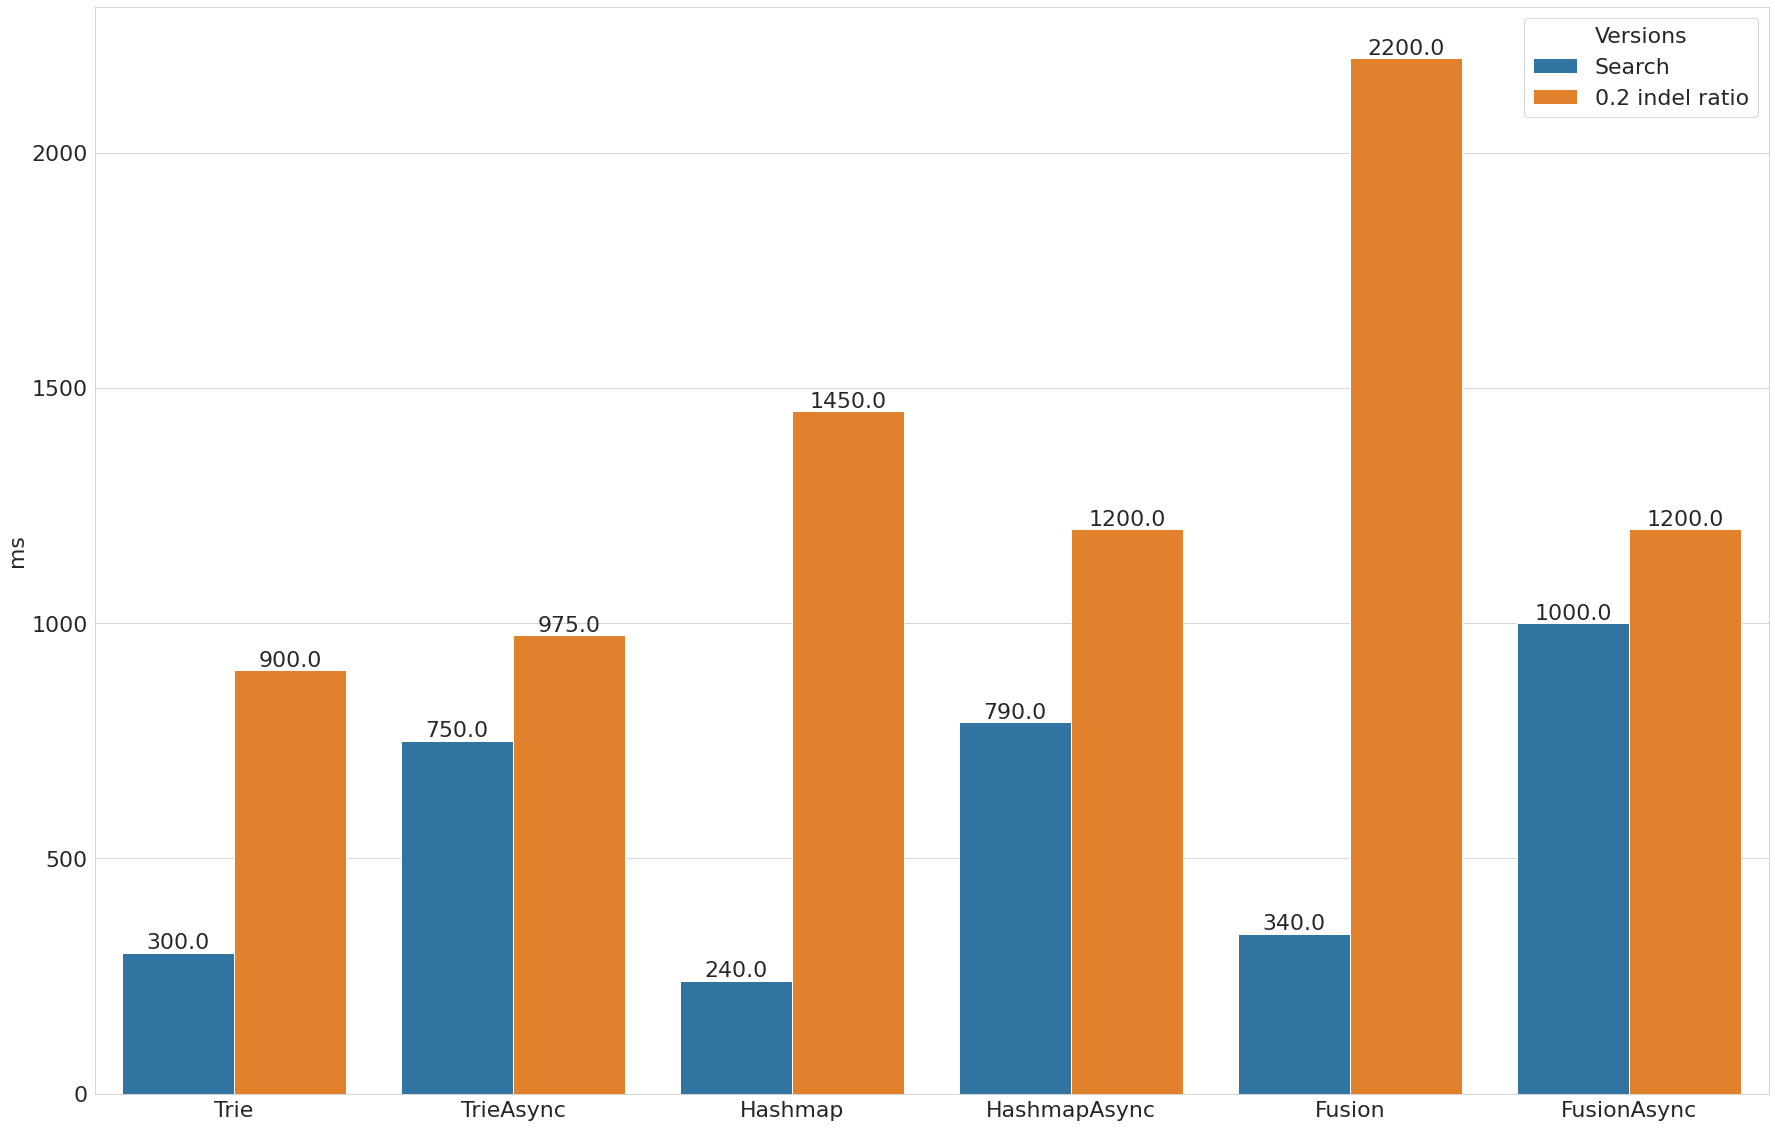

In [19]:
#%%
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
rcParams.update({'font.size': 22})

# #%%
sns.set_style("whitegrid")

data = {
    "Versions" : ['Search', '0.2 indel ratio'],
    'Trie' : [300, 900],
    'TrieAsync' : [750, 975],
    'Hashmap' : [240, 1450],
    'HashmapAsync' : [790, 1200],
    'Fusion' : [340, 2200],
    'FusionAsync' : [1000, 1200]
}


wide_df = pd.DataFrame(data)
tidy_df = wide_df.melt(id_vars="Versions", var_name="", value_name="Speed")
print(wide_df)
print(tidy_df)

ax = sns.barplot(data=tidy_df, x="", y="Speed",  hue="Versions")
ax.set_ylabel("ms")

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

if __name__ == "__main__" and len(sys.argv) > 1:
    plt.savefig(sys.argv[1],  transparent=True, bbox_inches="tight")
else:
    plt.show()